In [85]:
from annoy import AnnoyIndex
import pandas as pd
import numpy as np
import cv2
import sys  
sys.path.insert(0, '../')
import matplotlib.pyplot as plt
from bot.utils.color_extractor import ColorFeaturesExtractor, Mode
from bot.utils.BOVW_extractor import BOVWFeaturesExtractor
from bot.utils.hog_extractor import HogFeaturesExtractor
from bot.utils.retriever import Retriever
from bot.utils.utils import get_names_from_indexes
import tensorflow as tf
from skimage.io import imread
import pickle
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
import os

# Test retrieval

In [23]:
# utils
def show_images(idx, names_df, img_path):
    # plot starting image
    img_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=(2, 2))
    ax.imshow(img_rgb)
    plt.show()
    # extract names
    names = names_df.loc[idx,'name'].values
    # prepare plot
    n_elements = len(names)
    for i in range(0,n_elements):
        print(i+1)
        tmp = cv2.imread('../data/train/' + names[i])
        tmp = cv2.cvtColor(tmp, cv2.COLOR_BGR2RGB)
        plt.imshow(tmp)
        plt.show()
    #return names

def loadimg(img_path):

    im = tf.keras.preprocessing.image.load_img(
        img_path,
        target_size=(300, 300, 3)
    )
    imarr = tf.keras.preprocessing.image.img_to_array(im)
    imarr = tf.keras.applications.efficientnet.preprocess_input(imarr)
    return np.array([imarr])


# resnet
def preprocess_img(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    return img_data


In [86]:
imgs = os.listdir('../evaluation_imgs_test/')
imgs

['1005559.jpg',
 '1005728.jpg',
 '1009561.jpg',
 '1032275.jpg',
 '1042413.jpg',
 '1042669.jpg',
 '1042871.jpg',
 '1043184.jpg',
 '1065784.jpg',
 '1074543.jpg',
 '1077513.jpg',
 '1108119.jpg',
 '1120799.jpg',
 '1149322.jpg',
 '1209854.jpg',
 '1222361.jpg',
 '1293361.jpg',
 '1363583.jpg',
 '1411942.jpg',
 '1433161.jpg']

In [448]:
# instantiate retriever
retriever = Retriever('../indexes/', load_all=True)
# choose image
img_path = '../evaluation_imgs_test/' + imgs[19]
# settings
n_neighbours = 10

loading neural_network_pca ...
loading color_center_subregions ...
loading hog_pca ...
loading neural_network_resnet_pca ...


## Neural network efficientnet PCA

In [449]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [450]:
# # read model
# model_eff = tf.keras.models.load_model('../data/model.h5')

In [451]:
# NN
img_features_nn = model_eff.predict(loadimg(img_path))[1][0]
# read pca model
with open('../data/pca_nn.pckl', 'rb') as handle:
                    pca_nn = pickle.load(handle)
# apply pca
img_features_nn_pca = pca_nn.transform([img_features_nn])[0]

In [452]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_nn_pca, retrieval_mode='neural_network_pca', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


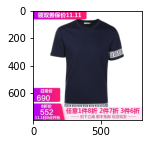

1


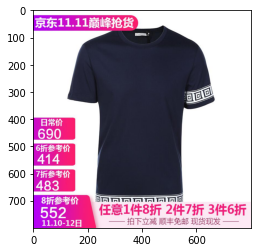

2


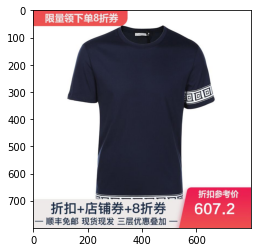

3


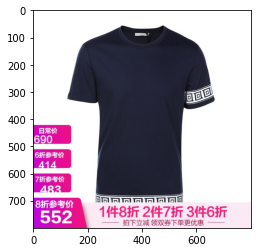

4


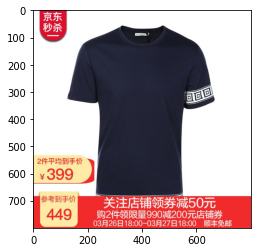

5


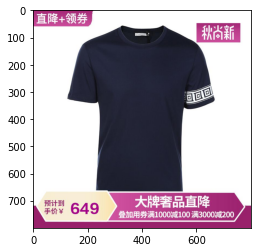

6


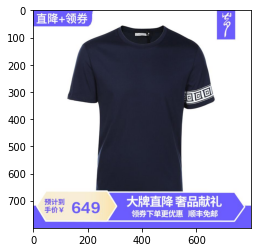

7


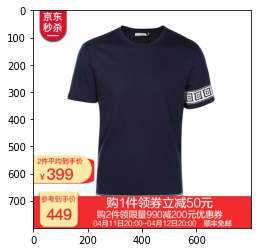

8


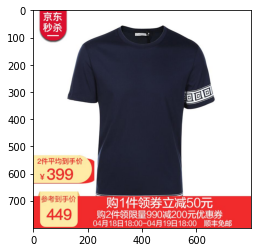

9


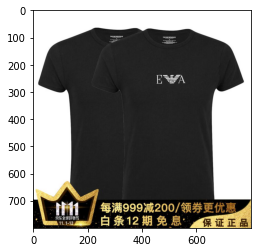

10


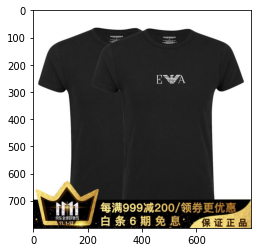

In [453]:
# show retrieval results
show_images(indexes, df_names, img_path)


## Neural network resnet PCA

In [454]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [455]:
# read model
model_res = ResNet50(weights='imagenet', include_top=False, pooling='max')

In [456]:
# NN
img_features_nn = model_res.predict(preprocess_img(img_path))[0]
# read pca model
with open('../data/pca_nn_resnet.pckl', 'rb') as handle:
                    pca_nn = pickle.load(handle)
# apply pca
img_features_nn_pca = pca_nn.transform([img_features_nn])[0]

In [457]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_nn_pca, retrieval_mode='neural_network_resnet_pca', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


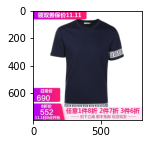

1


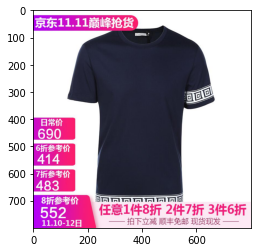

2


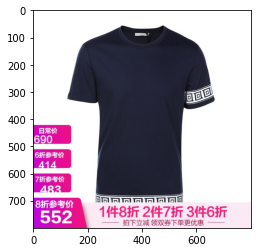

3


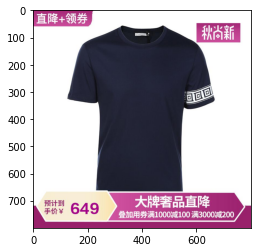

4


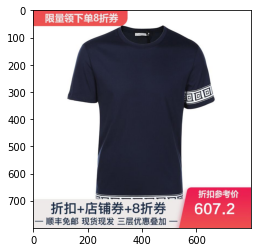

5


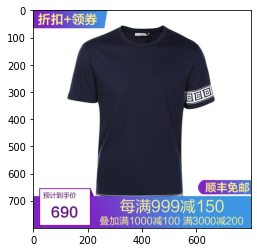

6


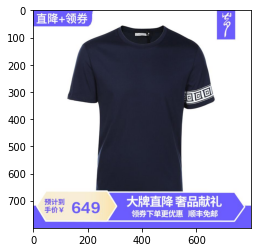

7


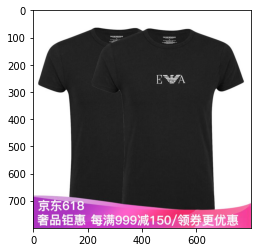

8


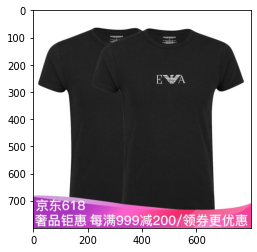

9


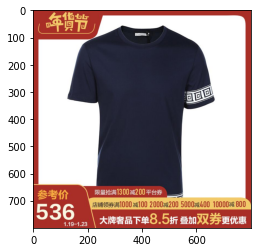

10


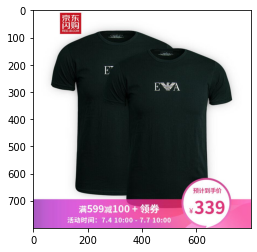

In [458]:
# show retrieval results
show_images(indexes, df_names, img_path)

## Color center subregions

In [459]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [460]:
# color extractor
features_extractor = ColorFeaturesExtractor((16, 18, 2), 0.6)
img_features_color = features_extractor.extract(cv2.imread(img_path), Mode.CENTER_SUBREGIONS)

In [461]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_color, retrieval_mode='color_center_subregions', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


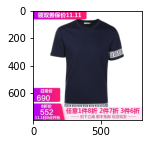

1


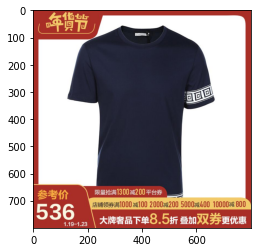

2


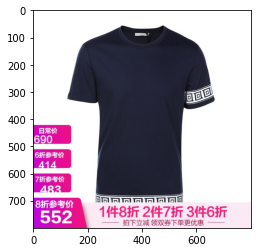

3


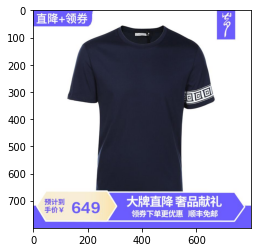

4


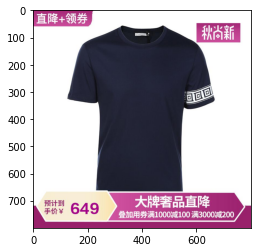

5


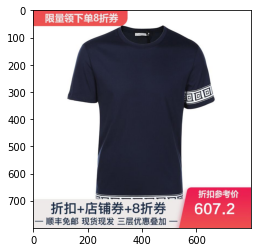

6


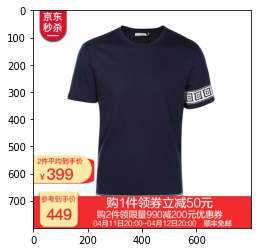

7


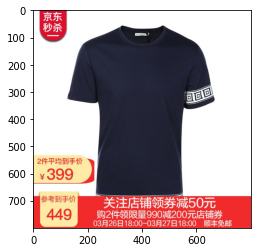

8


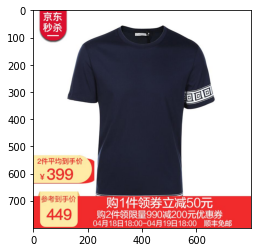

9


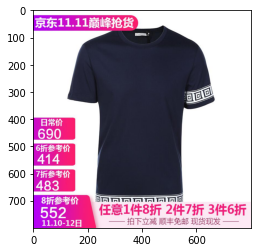

10


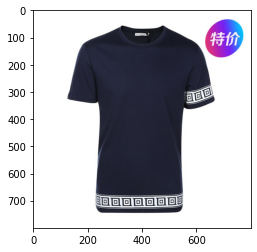

In [462]:
# show retrieval results
show_images(indexes, df_names, img_path)

## HOG PCA

In [463]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/rpo.jpg'

In [464]:
# HOG extractor
features_extractor = HogFeaturesExtractor()
img_features_hog = features_extractor.extract(imread(img_path))
# read pca model
with open('../data/pca_hog.pckl', 'rb') as handle:
                    pca_hog = pickle.load(handle)
# apply pca
img_features_hog_pca = pca_hog.transform([img_features_hog])[0]

In [465]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_hog_pca, retrieval_mode='hog_pca', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


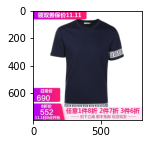

1


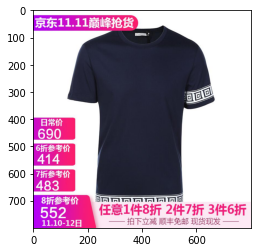

2


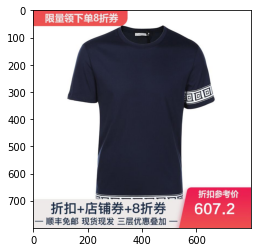

3


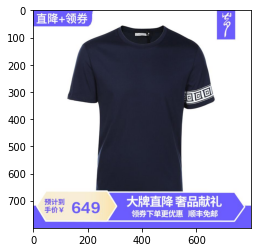

4


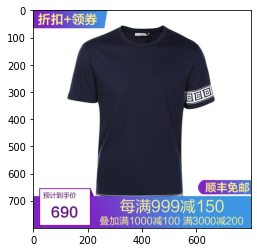

5


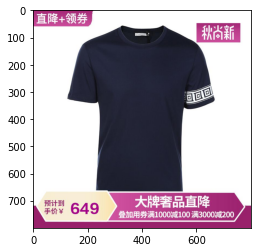

6


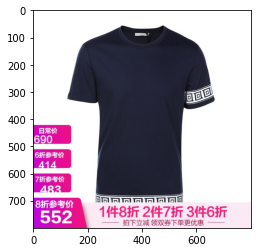

7


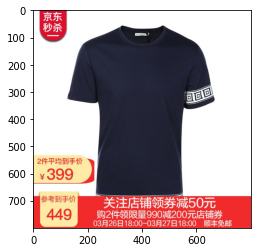

8


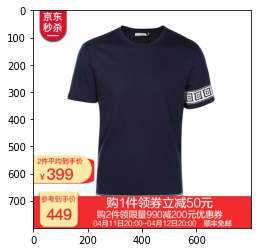

9


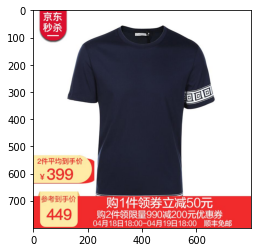

10


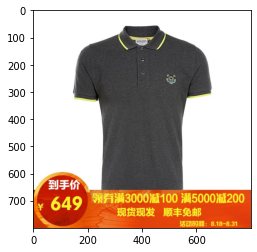

In [466]:
# show retrieval results
show_images(indexes, df_names, img_path)